### Classification Excercise with Decision tree

#### 1. Use Decision Trees on the iris dataset to classify the three types of iris – setosa, versicolor, virginica. What are the decision rules?

In [1]:
library(datasets)
head(iris)

iris_data <- iris # iris data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [2]:
str(iris_data)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [3]:
set.seed(12345)
iris_random <- iris_data[order(runif(nrow(iris_data))),]

In [4]:
# checking if randomization worked
head(data.frame(iris_random$Species, iris_data$Species))
dim(iris_random) #dimension of data
names(iris_random) #column names
table(iris_random$Species)

,iris_random.Species,iris_data.Species
,<fct>,<fct>
1,setosa,setosa
2,setosa,setosa
3,versicolor,setosa
4,virginica,setosa
5,versicolor,setosa
6,virginica,setosa


[1] 150   5

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"


    setosa versicolor  virginica 
        50         50         50 

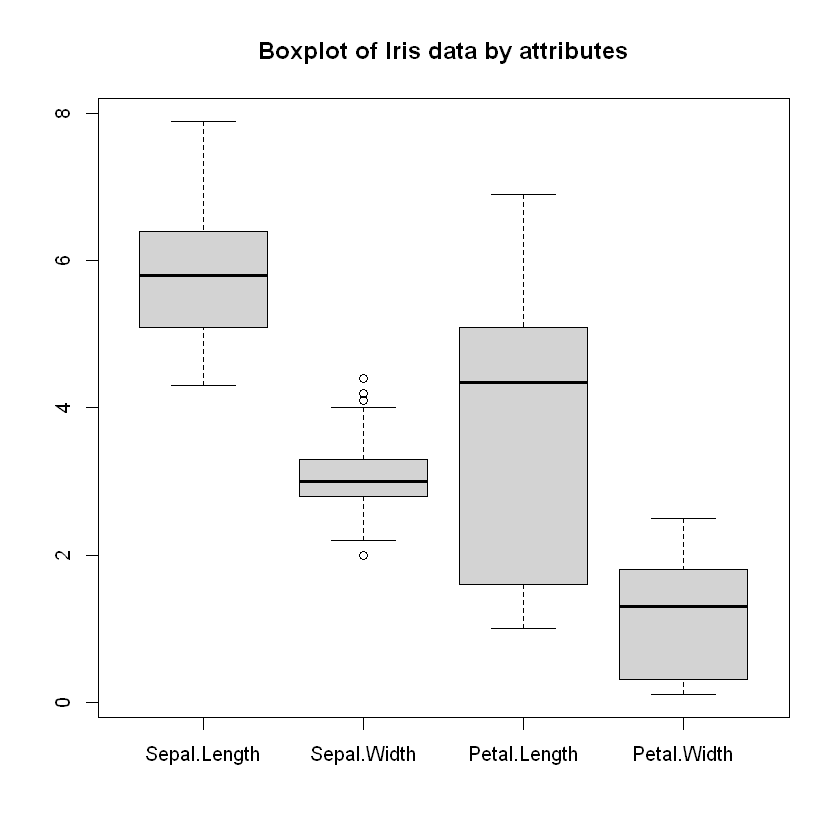

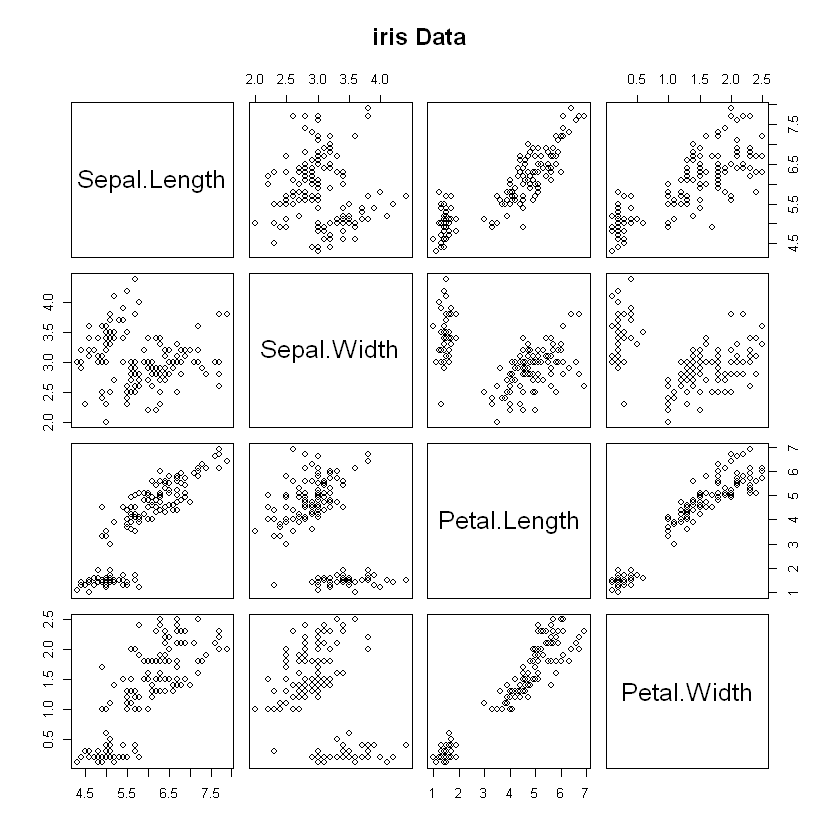

In [5]:
boxplot(iris[-5], main = 'Boxplot of Iris data by attributes') 
pairs(iris[,-5], main="iris Data", pch=21, bg = c("black", "red", "blue")[unclass(iris$Classification)]) 

In [6]:
summary(iris_random) #summarize

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [7]:
#change the Species field type to factor from character, so that they represent catagorical data
iris_random$Species <- as.factor(iris_random$Species)
str(iris_random)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  4.3 5.4 5.8 7.7 6 7.4 5.4 4.6 6.4 5.3 ...
 $ Sepal.Width : num  3 3.4 2.7 2.6 2.7 2.8 3.7 3.2 2.9 3.7 ...
 $ Petal.Length: num  1.1 1.5 3.9 6.9 5.1 6.1 1.5 1.4 4.3 1.5 ...
 $ Petal.Width : num  0.1 0.4 1.2 2.3 1.6 1.9 0.2 0.2 1.3 0.2 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 2 3 2 3 1 1 2 1 ...


In [8]:
# divide data in training and testing
numofcol <- ncol(iris_random)
numofrow <- nrow(iris_random)
n80 <- round(numofrow*.8)

iris_random_train <- iris_random[1:n80,] #train set
iris_random_test <- iris_random[(n80+1):numofrow,] #test set

iris_random_train_lbel <- iris_random[1:n80, numofcol] #train labels
iris_random_test_label <- iris_random[(n80+1):numofrow, numofcol] #test labels

In [9]:
dim(iris_random_train[,-numofcol])

[1] 120   4

In [10]:
dim(iris_random_train)

[1] 120   5

In [11]:
table(iris_random_train$Species)
table(iris_random_test$Species)


    setosa versicolor  virginica 
        42         40         38 


    setosa versicolor  virginica 
         8         10         12 

In [12]:
install.packages("C50")
library(C50)

package 'C50' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'C50'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Program Files\R\R-4.2.2\library\00LOCK\C50\libs\x64\C50.dll to C:\Program Files\R\R-4.2.2\library\C50\libs\x64\C50.dll: Permission denied"
Warning message:
"restored 'C50'"



The downloaded binary packages are in
	C:\Users\devops\AppData\Local\Temp\2\Rtmp6xwW8r\downloaded_packages


In [13]:
# executing the model
dtmodel <- C5.0(iris_random_train[,-numofcol], iris_random_train$Species)
dtmodel


Call:
C5.0.default(x = iris_random_train[, -numofcol], y = iris_random_train$Species)

Classification Tree
Number of samples: 120 
Number of predictors: 4 

Tree size: 4 

Non-standard options: attempt to group attributes


In [14]:
summary(dtmodel) # listing decision tree rules


Call:
C5.0.default(x = iris_random_train[, -numofcol], y = iris_random_train$Species)


C5.0 [Release 2.07 GPL Edition]  	Sun Feb 19 18:43:42 2023
-------------------------------

Class specified by attribute `outcome'

Read 120 cases (5 attributes) from undefined.data

Decision tree:

Petal.Length <= 1.9: setosa (42)
Petal.Length > 1.9:
:...Petal.Width > 1.7: virginica (35/1)
    Petal.Width <= 1.7:
    :...Petal.Length <= 4.9: versicolor (38/1)
        Petal.Length > 4.9: virginica (5/2)


Evaluation on training data (120 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     4    4( 3.3%)   <<


	   (a)   (b)   (c)    <-classified as
	  ----  ----  ----
	    42                (a): class setosa
	          37     3    (b): class versicolor
	           1    37    (c): class virginica


	Attribute usage:

	100.00%	Petal.Length
	 65.00%	Petal.Width


Time: 0.0 secs


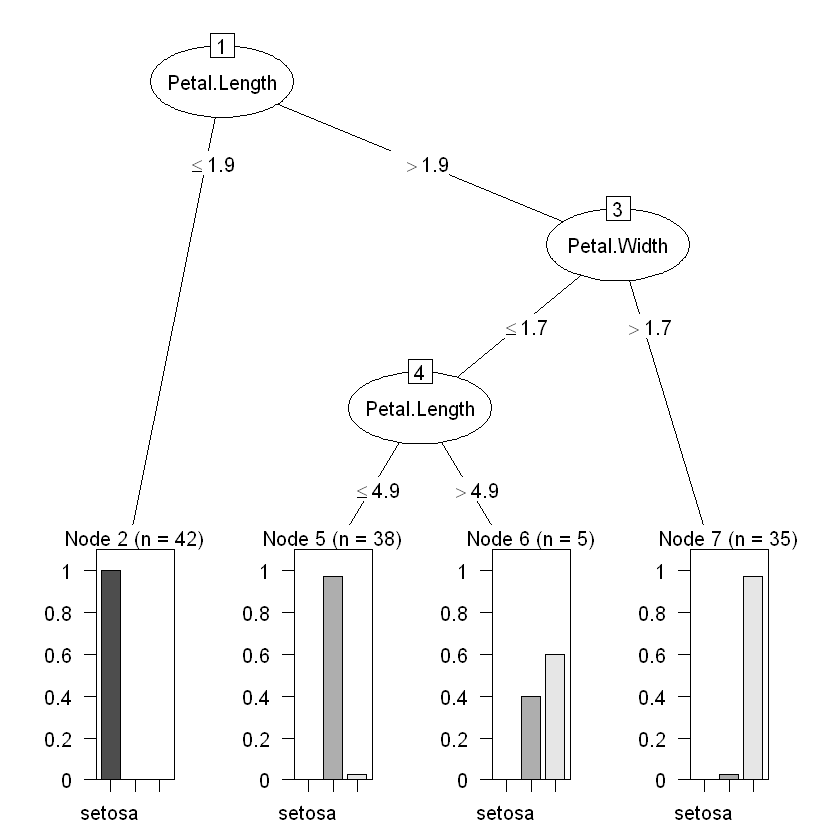

In [15]:
plot(dtmodel)

In [16]:
#model prediction
dtmodel_predicted <- predict(dtmodel, iris_random_test)

In [17]:
# cross tabulation of predicted versus actual classes
library(gmodels)

In [18]:
CrossTable(iris_random_test$Species, dtmodel_predicted, prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, dnn = c('actual Species', 'predicted Species'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  30 

 
               | predicted Species 
actual Species |     setosa | versicolor |  virginica |  Row Total | 
---------------|------------|------------|------------|------------|
        setosa |          8 |          0 |          0 |          8 | 
               |      0.267 |      0.000 |      0.000 |            | 
---------------|------------|------------|------------|------------|
    versicolor |          0 |         10 |          0 |         10 | 
               |      0.000 |      0.333 |      0.000 |            | 
---------------|------------|------------|------------|------------|
     virginica |          0 |          0 |         12 |         12 | 
               |      0.000 |      0.000 |      0.400 |            | 
---------------|------------|------------|------------|------------|
  Column Total |          

In [19]:
# Boost not needed as it is already 100% accurate

#### 2. Apply the OneR and RIPPER algorithms to classify credit (yes/no) in credit.csv. 
#### Apply the C50, algorithm to classify poisonous vs. edible mushrooms in mushroom.csv. 
#### How does the accuracy of the three models (i.e. including the models in the book) compare for each of the datasets?

##### >>>>>>>>>>preparing the data<<<<<<<<<<

In [20]:
# credit data
credit <- read.csv("./data/credit.csv", stringsAsFactors = FALSE)
str(credit) #structure of data

#randomizing data and confirming that it is done
set.seed(12345)
credit_random <- credit[order(runif(nrow(credit))),]

'data.frame':	1000 obs. of  17 variables:
 $ checking_balance    : chr  "< 0 DM" "1 - 200 DM" "unknown" "< 0 DM" ...
 $ months_loan_duration: int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history      : chr  "critical" "good" "critical" "good" ...
 $ purpose             : chr  "furniture/appliances" "furniture/appliances" "education" "furniture/appliances" ...
 $ amount              : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_balance     : chr  "unknown" "< 100 DM" "< 100 DM" "< 100 DM" ...
 $ employment_duration : chr  "> 7 years" "1 - 4 years" "4 - 7 years" "4 - 7 years" ...
 $ percent_of_income   : int  4 2 2 2 3 2 3 2 2 4 ...
 $ years_at_residence  : int  4 2 3 4 4 4 4 2 4 2 ...
 $ age                 : int  67 22 49 45 53 35 53 35 61 28 ...
 $ other_credit        : chr  "none" "none" "none" "none" ...
 $ housing             : chr  "own" "own" "own" "other" ...
 $ existing_loans_count: int  2 1 1 1 2 1 1 1 1 2 ...
 $ job                 : chr  "skilled

In [21]:
# encoding catagorical data as factors as C50, OneR and Ripper algorithms are susseptile to that.
credit_random$checking_balance <- as.factor(credit_random$checking_balance)
credit_random$credit_history <- as.factor(credit_random$credit_history)
credit_random$purpose <- as.factor(credit_random$purpose)
credit_random$savings_balance <- as.factor(credit_random$savings_balance)
credit_random$employment_duration <- as.factor(credit_random$employment_duration)
credit_random$other_credit <- as.factor(credit_random$other_credit)
credit_random$housing <- as.factor(credit_random$housing)
credit_random$job <- as.factor(credit_random$job)
credit_random$phone <- as.factor(credit_random$phone)
credit_random$default <- as.factor(credit_random$default)
credit_random$existing_loans_count <- as.factor(credit_random$existing_loans_count)
credit_random$dependents <- as.factor(credit_random$dependents)
str(credit_random) #structure of data

'data.frame':	1000 obs. of  17 variables:
 $ checking_balance    : Factor w/ 4 levels "< 0 DM","> 200 DM",..: 1 3 3 1 3 4 1 3 3 1 ...
 $ months_loan_duration: int  24 7 12 24 9 18 33 9 20 15 ...
 $ credit_history      : Factor w/ 5 levels "critical","good",..: 1 2 2 2 1 2 1 2 4 2 ...
 $ purpose             : Factor w/ 6 levels "business","car",..: 2 5 5 5 4 1 5 5 3 5 ...
 $ amount              : int  1199 2576 1103 4020 1501 1568 4281 918 2629 1845 ...
 $ savings_balance     : Factor w/ 5 levels "< 100 DM","> 1000 DM",..: 1 1 1 1 1 3 4 1 1 1 ...
 $ employment_duration : Factor w/ 5 levels "< 1 year","> 7 years",..: 2 3 4 3 2 3 3 3 3 1 ...
 $ percent_of_income   : int  4 2 4 2 2 3 1 4 2 4 ...
 $ years_at_residence  : int  4 2 3 2 3 4 4 1 3 1 ...
 $ age                 : int  60 35 29 27 34 24 23 30 29 46 ...
 $ other_credit        : Factor w/ 3 levels "bank","none",..: 2 2 2 3 2 2 2 2 1 2 ...
 $ housing             : Factor w/ 3 levels "other","own",..: 2 2 2 2 2 3 2 2 2 3 ...
 $ existi

In [22]:
head(credit_random)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
14,< 0 DM,24,critical,car,1199,< 100 DM,> 7 years,4,4,60,none,own,2,unskilled,1,no,yes
448,1 - 200 DM,7,good,furniture/appliances,2576,< 100 DM,1 - 4 years,2,2,35,none,own,1,skilled,1,no,no
697,1 - 200 DM,12,good,furniture/appliances,1103,< 100 DM,4 - 7 years,4,3,29,none,own,2,skilled,1,no,no
32,< 0 DM,24,good,furniture/appliances,4020,< 100 DM,1 - 4 years,2,2,27,store,own,1,skilled,1,no,no
196,1 - 200 DM,9,critical,education,1501,< 100 DM,> 7 years,2,3,34,none,own,2,management,1,yes,yes
83,unknown,18,good,business,1568,100 - 500 DM,1 - 4 years,3,4,24,none,rent,1,unskilled,1,no,no


In [23]:
# mushroom data
mushrooms <- read.csv("./data/mushrooms.csv", stringsAsFactors = TRUE) # encodinf as factor to make sure it is acceptable to algorithms
str(mushrooms) #structure of data 

'data.frame':	8124 obs. of  23 variables:
 $ type                    : Factor w/ 2 levels "edible","poisonous": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap_shape               : Factor w/ 6 levels "bell","conical",..: 3 3 1 3 3 3 1 1 3 1 ...
 $ cap_surface             : Factor w/ 4 levels "fibrous","grooves",..: 4 4 4 3 4 3 4 3 3 4 ...
 $ cap_color               : Factor w/ 10 levels "brown","buff",..: 1 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "almond","anise",..: 8 1 2 8 7 1 1 2 8 1 ...
 $ gill_attachment         : Factor w/ 2 levels "attached","free": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill_spacing            : Factor w/ 2 levels "close","crowded": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill_size               : Factor w/ 2 levels "broad","narrow": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill_color              : Factor w/ 12 levels "black","brown",..: 1 1 2 2 1 2 5 2 8 5 ...
 $ stalk_shape             : Factor w/

In [24]:
#randomizing data and confirming that it is done
set.seed(12345)
mushrooms_random <- mushrooms[order(runif(nrow(mushrooms))),]
head(mushrooms_random)

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,⋯,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
7339,poisonous,knobbed,scaly,brown,no,foul,free,close,narrow,buff,⋯,silky,pink,pink,partial,white,one,evanescent,white,several,paths
2723,edible,flat,fibrous,gray,yes,none,free,close,broad,pink,⋯,smooth,gray,pink,partial,white,one,pendant,brown,solitary,woods
1100,poisonous,convex,scaly,brown,yes,pungent,free,close,narrow,brown,⋯,smooth,white,white,partial,white,one,pendant,brown,scattered,grasses
6467,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,⋯,smooth,pink,white,partial,white,one,evanescent,white,several,paths
4479,poisonous,flat,fibrous,yellow,no,foul,free,close,broad,chocolate,⋯,silky,buff,buff,partial,white,one,large,chocolate,solitary,paths
3599,edible,flat,scaly,brown,yes,none,free,close,broad,brown,⋯,smooth,pink,gray,partial,white,one,pendant,black,solitary,woods


##### >>>>>>>>>>using Rule Learner models on the data<<<<<<<<<<
##### Note: Can not initalize all agorithms together as they conflict so going through them one at a time

In [25]:
# using all data as we are trying to detect rules and not preparing for unforseen data.
# model relationship between 'type' against all predictors '.' or mention their names like x1 + x2 +x3 and so on

In [26]:
# initializing OneR
library(devtools)
install.packages("rJava")
library(rJava)
library(OneR)

Loading required package: usethis



package 'rJava' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rJava'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Program Files\R\R-4.2.2\library\00LOCK\rJava\libs\x64\rJava.dll to C:\Program Files\R\R-4.2.2\library\rJava\libs\x64\rJava.dll: Permission denied"
Warning message:
"restored 'rJava'"



The downloaded binary packages are in
	C:\Users\devops\AppData\Local\Temp\2\Rtmp6xwW8r\downloaded_packages


In [27]:
# Working with OneR on CREDIT data and MUSHROOM data
credit_1R <- OneR(default ~ ., data = credit_random) 
mushrooms_1R <- OneR(type ~ ., data = mushrooms_random) 

# checking for rules generated
credit_1R 
mushrooms_1R


Call:
OneR.formula(formula = default ~ ., data = credit_random)

Rules:
If credit_history = critical  then default = no
If credit_history = good      then default = no
If credit_history = perfect   then default = yes
If credit_history = poor      then default = no
If credit_history = very good then default = yes

Accuracy:
717 of 1000 instances classified correctly (71.7%)



Call:
OneR.formula(formula = type ~ ., data = mushrooms_random)

Rules:
If odor = almond   then type = edible
If odor = anise    then type = edible
If odor = creosote then type = poisonous
If odor = fishy    then type = poisonous
If odor = foul     then type = poisonous
If odor = musty    then type = poisonous
If odor = none     then type = edible
If odor = pungent  then type = poisonous
If odor = spicy    then type = poisonous

Accuracy:
8004 of 8124 instances classified correctly (98.52%)


In [28]:
# making predictions for comparision later
credit_1R_pred <- predict(credit_1R, credit_random)
mushrooms_1R_pred <- predict(mushrooms_1R, mushrooms_random)

In [29]:
# initializing Ripper
install.packages("RWeka")
library(RWeka)

package 'RWeka' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'RWeka'"
Warning message:
"restored 'RWeka'"



The downloaded binary packages are in
	C:\Users\devops\AppData\Local\Temp\2\Rtmp6xwW8r\downloaded_packages



Attaching package: 'RWeka'


The following object is masked from 'package:OneR':

    OneR




In [30]:
# Working with Ripper on CREDIT data and MUSHROOM data
credit_JRip <- JRip(default ~ ., data = credit_random)
mushrooms_JRip <- JRip(type ~ ., data = mushrooms_random)

# checking for rules generated
credit_JRip
mushrooms_JRip

JRIP rules:

(checking_balance = < 0 DM) and (months_loan_duration >= 16) => default=yes (166.0/68.0)
(checking_balance = 1 - 200 DM) and (months_loan_duration >= 24) and (savings_balance = < 100 DM) => default=yes (61.0/19.0)
 => default=no (773.0/160.0)

Number of Rules : 3


JRIP rules:

(odor = foul) => type=poisonous (2160.0/0.0)
(gill_size = narrow) and (gill_color = buff) => type=poisonous (1152.0/0.0)
(gill_size = narrow) and (odor = pungent) => type=poisonous (256.0/0.0)
(odor = creosote) => type=poisonous (192.0/0.0)
(spore_print_color = green) => type=poisonous (72.0/0.0)
(stalk_surface_below_ring = scaly) and (stalk_surface_above_ring = silky) => type=poisonous (68.0/0.0)
(stalk_color_above_ring = yellow) => type=poisonous (8.0/0.0)
(habitat = leaves) and (cap_color = white) => type=poisonous (8.0/0.0)
 => type=edible (4208.0/0.0)

Number of Rules : 9


In [31]:
# making predictions for comparision later
credit_JRip_pred <- predict(credit_JRip, credit_random)
mushrooms_JRip_pred <- predict(mushrooms_JRip, mushrooms_random)

In [32]:
# initializing C50
install.packages("C50")
library(C50) 

Warning message:
"package 'C50' is in use and will not be installed"


In [33]:
# Working with C50 decision tree algo on CREDIT data
credit_c5rules <- C5.0(default ~ ., data = credit_random, rules = TRUE)

# checking for rules generated
(credit_c5rules)


Call:
C5.0.formula(formula = default ~ ., data = credit_random, rules = TRUE)

Rule-Based Model
Number of samples: 1000 
Number of predictors: 16 

Number of Rules: 24 

Non-standard options: attempt to group attributes


In [34]:
# Working with C50 decision tree algo on MUSHROOM data
#>>>> NOTE: 
# decision tree with rule learner fails with complete dataset as attribute 'veil type' has only one level 'partial' and so it exits with exit code 1.
# in summary of the result it shouws this message so i removed that column or property from the data.
# this decision does not affect the result as it never served any variation.

mushrooms_c5rules <- C5.0(type ~ ., data = mushrooms_random[,-17], rules = TRUE) # gets error 

# checking for rules generated
summary(mushrooms_c5rules)


Call:
C5.0.formula(formula = type ~ ., data = mushrooms_random[, -17], rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Sun Feb 19 18:43:56 2023
-------------------------------

Class specified by attribute `outcome'

Read 8124 cases (22 attributes) from undefined.data

Rules:

Rule 1: (4148/4, lift 1.9)
	cap_surface in {fibrous, scaly, smooth}
	odor in {almond, anise, none}
	stalk_color_below_ring in {gray, orange, pink, red, white}
	spore_print_color in {black, brown, buff, chocolate, orange, purple,
                              white, yellow}
	->  class edible  [0.999]

Rule 2: (3500/12, lift 1.9)
	cap_surface in {fibrous, scaly, smooth}
	odor in {almond, anise, none}
	stalk_root in {bulbous, club, equal, rooted}
	spore_print_color in {black, brown, purple, white}
	->  class edible  [0.996]

Rule 3: (3796, lift 2.1)
	odor in {creosote, fishy, foul, musty, pungent, spicy}
	->  class poisonous  [1.000]

Rule 4: (72, lift 2.0)
	spore_print_color = green
	->  class poisonous  [0.986]

In [35]:
# making predictions for comparision later
credit_c5rules_pred <- predict(credit_c5rules, credit_random)
mushrooms_c5rules_pred <- predict(mushrooms_c5rules, mushrooms_random)

##### >>>>>>>>>>comparing the accuracy of rules generated by the models<<<<<<<<<<

In [36]:
install.packages('MLmetrics')
library(MLmetrics)

package 'MLmetrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\devops\AppData\Local\Temp\2\Rtmp6xwW8r\downloaded_packages



Attaching package: 'MLmetrics'


The following object is masked from 'package:base':

    Recall




In [37]:
print("========== CREDIT DATA RESULTS ==========")
sprintf("OneR accuracy for credit data: %f", (MLmetrics::Accuracy(credit_1R_pred, credit_random$default)*100))
sprintf("RIPPER accuracy for credit data: %f", (MLmetrics::Accuracy(credit_JRip_pred, credit_random$default)*100))
sprintf("C50 Decision tree rule learner accuracy for credit data: %f", (MLmetrics::Accuracy(credit_c5rules_pred, credit_random$default)*100))
sprintf("    ")
print("========== MUSHROOM DATA RESULTS ==========")
sprintf("OneR accuracy for mushroom data: %f", (MLmetrics::Accuracy(mushrooms_1R_pred, mushrooms_random$type)*100))
sprintf("RIPPER accuracy for mushroom data: %f", (MLmetrics::Accuracy(mushrooms_JRip_pred, mushrooms_random$type)*100))
sprintf("C50 Decision tree rule learner accuracy for mushroom data: %f", (MLmetrics::Accuracy(mushrooms_c5rules_pred, mushrooms_random$type)*100))

[1] "========== CREDIT DATA RESULTS =========="


[1] "OneR accuracy for credit data: 71.700000"

[1] "RIPPER accuracy for credit data: 75.300000"

[1] "C50 Decision tree rule learner accuracy for credit data: 85.300000"

[1] "    "

[1] "========== MUSHROOM DATA RESULTS =========="


[1] "OneR accuracy for mushroom data: 98.522895"

[1] "RIPPER accuracy for mushroom data: 100.000000"

[1] "C50 Decision tree rule learner accuracy for mushroom data: 99.852290"

In [38]:
# sample validation table
CrossTable(credit_random$default, credit_1R_pred, prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, dnn = c('actual', 'predicted'))


table(actual = credit_random$default, predicted = credit_1R_pred)
table(actual = credit_random$default, predicted = credit_JRip_pred)
table(actual = credit_random$default, predicted = credit_c5rules_pred)
table(actual = mushrooms_random$type, predicted = mushrooms_1R_pred)
table(actual = mushrooms_random$type, predicted = mushrooms_JRip_pred)
table(actual = mushrooms_random$type, predicted = mushrooms_c5rules_pred)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1000 

 
             | predicted 
      actual |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |       664 |        36 |       700 | 
             |     0.664 |     0.036 |           | 
-------------|-----------|-----------|-----------|
         yes |       247 |        53 |       300 | 
             |     0.247 |     0.053 |           | 
-------------|-----------|-----------|-----------|
Column Total |       911 |        89 |      1000 | 
-------------|-----------|-----------|-----------|

 


      predicted
actual  no yes
   no  664  36
   yes 247  53

      predicted
actual  no yes
   no  613  87
   yes 160 140

      predicted
actual  no yes
   no  668  32
   yes 115 185

           predicted
actual      edible poisonous
  edible      4208         0
  poisonous    120      3796

           predicted
actual      edible poisonous
  edible      4208         0
  poisonous      0      3916

           predicted
actual      edible poisonous
  edible      4208         0
  poisonous     12      3904

#### 3. Use the caret package and evaluate the models in 1 and 2 above in terms of accuracy, kappa statistic, sensitivity, specificity, and the F-measure. 

In [40]:
install.packages("caret", dependencies = c("Depends", "Suggests"))

Warning message:
"dependencies 'unix', 'glmmADMB', 'graph', 'Biostrings', 'seqLogo', 'Rcampdf', 'Rgraphviz', 'Rpoppler', 'tm.lexicon.GeneralInquirer', 'cmdstanr', 'Biobase', 'RandomFields', 'RandomFieldsUtils', 'starsdata', 'RDCOMClient', 'marray', 'affy', 'limma', 'spDataLarge', 'dblog', 'GAMBoost', 'globaltest', 'doMC', 'M3C', 'taxidata', 'extraTrees', 'genefilter', 'sva', 'Vdgraph', 'BiocVersion' are not available"
also installing the dependencies 'Rmosek', 'webfakes', 'asciicast', 'shinyjs', 'REBayes', 'entropy', 'fdrtool', 'geojsonlint', 'gistr', 'filelock', 'pingr', 'pkgcache', 'pkgdepends', 'pkgsearch', 'cobs', 'mvPot', 'gmm', 'ismev', 'TruncatedNormal', 'rngWELL', 'TSP', 'kdecopula', 'ashr', 'sda', 'binda', 'flexdashboard', 'geojsonio', 'BiocManager', 'packrat', 'pak', 'showtextdb', 'adespatial', 'Matching', 'mbest', 'crop', 'lcopula', 'mev', 'mvnormtest', 'qrng', 'randtoolbox', 'Runuran', 'VineCopula', 'bartMachineJARs', 'missForest', 'ncvreg', 'gettz', 'memuse', 'crossval', '


  There are binary versions available but the source versions are later:
           binary  source needs_compilation
logitr      1.0.0   1.0.1             FALSE
DescTools 0.99.47 0.99.48              TRUE

  Binaries will be installed


Package which is only available in source form, and may need
  compilation of C/C++/Fortran: 'BRugs'



  These will not be installed
package 'Rmosek' successfully unpacked and MD5 sums checked
package 'webfakes' successfully unpacked and MD5 sums checked
package 'asciicast' successfully unpacked and MD5 sums checked
package 'shinyjs' successfully unpacked and MD5 sums checked
package 'REBayes' successfully unpacked and MD5 sums checked
package 'entropy' successfully unpacked and MD5 sums checked
package 'fdrtool' successfully unpacked and MD5 sums checked
package 'geojsonlint' successfully unpacked and MD5 sums checked
package 'gistr' successfully unpacked and MD5 sums checked
package 'filelock' successfully unpacked and MD5 sums checked
package 'pingr' successfully unpacked and MD5 sums checked
package 'pkgcache' successfully unpacked and MD5 sums checked
package 'pkgdepends' successfully unpacked and MD5 sums checked
package 'pkgsearch' successfully unpacked and MD5 sums checked
package 'cobs' successfully unpacked and MD5 sums checked
package 'mvPot' successfully unpacked and MD5 sum

installing the source package 'logitr'




In [42]:
library(caret)
library(klaR)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following objects are masked from 'package:MLmetrics':

    MAE, RMSE


Loading required package: MASS



In [43]:
confusionMatrix(credit_random$default, credit_1R_pred)

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  664  36
       yes 247  53
                                         
               Accuracy : 0.717          
                 95% CI : (0.688, 0.7447)
    No Information Rate : 0.911          
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1567         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.7289         
            Specificity : 0.5955         
         Pos Pred Value : 0.9486         
         Neg Pred Value : 0.1767         
             Prevalence : 0.9110         
         Detection Rate : 0.6640         
   Detection Prevalence : 0.7000         
      Balanced Accuracy : 0.6622         
                                         
       'Positive' Class : no             
                                         

In [39]:
# Clear plots
dev.off()  # But only if there IS a plot

# Clear console
cat("\014")  # ctrl+L

null device 
          1